# CNN + Data Augmentation 練習

In [1]:
# Check GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
# import package
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Cifar10 資料讀入及前處理

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train[:10000,:,:,:] 
y_train = y_train[:10000,]

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (10000, 32, 32, 3)
10000 train samples
10000 test samples


In [4]:
# image preprocessing
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255  # rescaling
x_test = x_test/255  # rescaling

In [5]:
print(type(x_train[6]))
print(x_train[6].shape)

<class 'numpy.ndarray'>
(32, 32, 3)


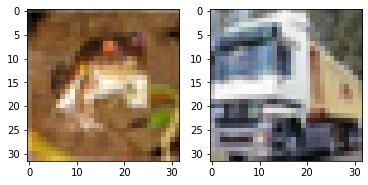

(32, 32, 3)

In [6]:
# show image

fig = plt.figure()
plt.subplot(121)
plt.imshow(x_train[0])

plt.subplot(122)
plt.imshow(x_train[1])

plt.show()

x_train[1].shape


In [7]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)

y_train shape: (10000, 10)


In [8]:
## result's dictionary
model_result = dict()
model_result['acc'] = dict()
model_result['loss'] = dict()
model_result['val_acc'] = dict()
model_result['val_loss'] = dict()

## 模型定義

In [9]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    return model

In [10]:
model = build_model()

# initiate optimizer
learning_rate = 0.001
optimizer = keras.optimizers.Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [11]:
model_augmentation = build_model()

# initiate optimizer
learning_rate = 0.001
optimizer = keras.optimizers.Adam(lr=learning_rate)

model_augmentation.compile(loss='categorical_crossentropy',
                           optimizer=optimizer,
                           metrics=['accuracy'])

## 開始訓練模型 (without data augmentation)

In [12]:
data_augmentation = True
batch_size = 32
epochs = 15

In [13]:
print('Not using data augmentation.')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

# 紀錄結果
experiment = "without data augmentation"

model_result['acc'][experiment] = model.history.history.get('accuracy')
model_result['val_acc'][experiment] = model.history.history.get('val_accuracy')
model_result['loss'][experiment] = model.history.history.get('loss')
model_result['val_loss'][experiment] = model.history.history.get('val_loss')

Not using data augmentation.
Train on 10000 samples, validate on 10000 samples
Epoch 1/15
10000/10000 [==============================] - 6s 563us/sample - loss: 1.7409 - accuracy: 0.3997 - val_loss: 2.9404 - val_accuracy: 0.1824
Epoch 2/15
10000/10000 [==============================] - 2s 236us/sample - loss: 1.3492 - accuracy: 0.5189 - val_loss: 1.5148 - val_accuracy: 0.4866
Epoch 3/15
10000/10000 [==============================] - 2s 239us/sample - loss: 1.1499 - accuracy: 0.5849 - val_loss: 1.5173 - val_accuracy: 0.4829
Epoch 4/15
10000/10000 [==============================] - 2s 236us/sample - loss: 1.0028 - accuracy: 0.6403 - val_loss: 1.3507 - val_accuracy: 0.5372
Epoch 5/15
10000/10000 [==============================] - 2s 235us/sample - loss: 0.8938 - accuracy: 0.6844 - val_loss: 1.1101 - val_accuracy: 0.6185
Epoch 6/15
10000/10000 [==============================] - 2s 234us/sample - loss: 0.8123 - accuracy: 0.7137 - val_loss: 0.9549 - val_accuracy: 0.6609
Epoch 7/15
10000/1000

## 開始訓練模型 (with data augmentation)

In [14]:
data_augmentation = True
batch_size = 32
epochs = 15

In [15]:
featurewise_center = False
samplewise_center = False
featurewise_std_normalization = False
samplewise_std_normalization = False
rotation_range = 0
width_shift_range = 0.1
height_shift_range = 0.1
horizontal_flip = True
vertical_flip = False
fill_mode = 'constant'
cval = 0

# This will do preprocessing and realtime data augmentation:
# https://keras.io/preprocessing/image/
datagen = ImageDataGenerator(
    featurewise_center=featurewise_center,  # 為使數據集去中心化(使均值為0)
    samplewise_center=samplewise_center,  # 使輸入數據的每個樣本均值為0
    featurewise_std_normalization=featurewise_std_normalization,  # 將輸入除以數據集的標準差以完成標準化
    samplewise_std_normalization=samplewise_std_normalization,  # 將輸入的每個樣本除以其自身的標準差
    rotation_range=rotation_range, # 隨機旋轉的度數範圍。 (degrees, 0 to 180)
    width_shift_range=width_shift_range,  # 隨機水平移動的範圍。 (總高度的比例)
    height_shift_range=height_shift_range,  # 隨機垂直移動的範圍。 (總高度的比例)
    horizontal_flip=horizontal_flip,  # 隨機水平翻轉。
    vertical_flip=vertical_flip,  # 隨機垂直翻轉
    fill_mode=fill_mode,  # 補全缺失圖片值
    cval=cval)  ## 補浮點數或整數用於邊界之外的點的值 (當fill mode = constant時需要用到)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

After Data augmentation ：


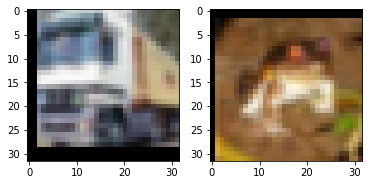

In [16]:
# data Augmentation後的圖片
print('After Data augmentation ：')
datagenerator = datagen.flow(x_train[0:2],batch_size=2)

img_after_augmentation = datagenerator.next()

# show the image

fig = plt.figure()
plt.subplot(121)
plt.grid(False)
plt.imshow(img_after_augmentation[0])

plt.subplot(122)
plt.grid(False)
plt.imshow(img_after_augmentation[1])

plt.show()

In [17]:
print('Using real-time data augmentation.')

# Fit the model on the batches generated by datagen.flow().
model_augmentation.fit_generator(datagen.flow(x_train, y_train,
                                              batch_size=batch_size),
                                 steps_per_epoch=x_train.shape[0] // batch_size +1,
                                 epochs=epochs,
                                 validation_data=(x_test, y_test))

# 紀錄結果
experiment = "with data augmentation"

model_result['acc'][experiment] = model_augmentation.history.history.get('accuracy')
model_result['val_acc'][experiment] = model_augmentation.history.history.get('val_accuracy')
model_result['loss'][experiment] = model_augmentation.history.history.get('loss')
model_result['val_loss'][experiment] = model_augmentation.history.history.get('val_loss')

Using real-time data augmentation.
Epoch 1/15
313/313 [==============================] - 21s 66ms/step - loss: 1.8463 - accuracy: 0.3529 - val_loss: 2.1378 - val_accuracy: 0.2826
Epoch 2/15
313/313 [==============================] - 21s 66ms/step - loss: 1.5379 - accuracy: 0.4438 - val_loss: 1.4670 - val_accuracy: 0.4726
Epoch 3/15
313/313 [==============================] - 21s 66ms/step - loss: 1.4250 - accuracy: 0.4926 - val_loss: 1.6541 - val_accuracy: 0.4609
Epoch 4/15
313/313 [==============================] - 21s 66ms/step - loss: 1.3111 - accuracy: 0.5297 - val_loss: 1.2688 - val_accuracy: 0.5612
Epoch 5/15
313/313 [==============================] - 21s 66ms/step - loss: 1.2033 - accuracy: 0.5646 - val_loss: 1.1918 - val_accuracy: 0.5721
Epoch 6/15
313/313 [==============================] - 21s 66ms/step - loss: 1.1500 - accuracy: 0.5966 - val_loss: 1.2222 - val_accuracy: 0.5636
Epoch 7/15
313/313 [==============================] - 21s 66ms/step - loss: 1.0951 - accuracy: 0.6127

## 訓練結果視覺化

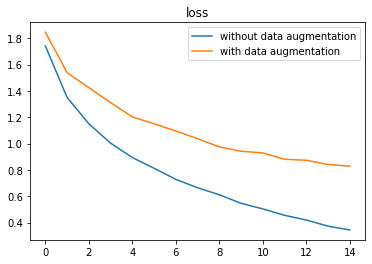

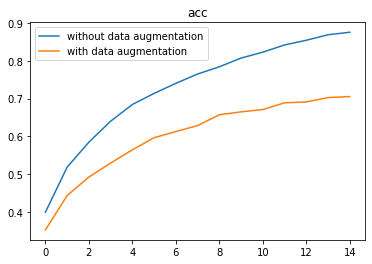

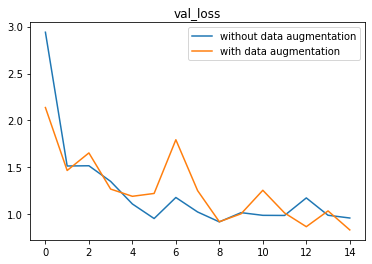

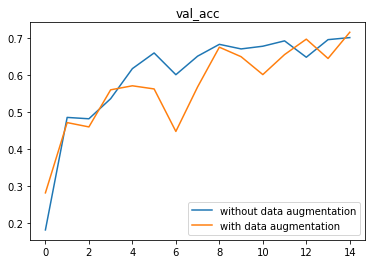

In [18]:
# training loss
for i in model_result['loss'].keys():
    plt.plot(np.arange(len(model_result['loss'][i])), model_result['loss'][i], label = i)

plt.legend(loc='best')
plt.title('loss')
plt.show()

# training acc
for i in model_result['acc'].keys():
    plt.plot(np.arange(len(model_result['acc'][i])), model_result['acc'][i], label = i)

plt.legend(loc='best')
plt.title('acc')
plt.show()

# valid loss
for i in model_result['val_loss'].keys():
    plt.plot(np.arange(len(model_result['val_loss'][i])), model_result['val_loss'][i], label = i)

plt.legend(loc='best')
plt.title('val_loss')
plt.show()


# valid acc
for i in model_result['val_acc'].keys():
    plt.plot(np.arange(len(model_result['val_acc'][i])), model_result['val_acc'][i], label = i)

plt.legend(loc='best')
plt.title('val_acc')
plt.show()